### This notebook answers the CoderPad Interview question
**Success criteria**

At minimum, a candidate should be able to conduct a basic analysis showing that they explored the data and found a way to separate the unique characteristics of each flower from the other.

**For example:**

1) Does one species of iris have longer petals than the other?
2) Can the candidate pose questions about the dataset and explore the data for answers to those questions?
3) Are the methods the candidate uses to explore the data reasonable? This question primarily requires some basic analysis and data visualization.  If a candidate starts off with a more complex approach, there may be a missed opportunity for fast, early lessons from the data, aka “low-hanging fruit.”
4) Can the candidate support any observations with plots?
5) How does the candidate form inferences from the data and how well does that candidate apply statistics to defend their inferences?

In [58]:
# Import Packages
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [41]:
# Settings
pd.set_option('display.max_columns', None)

### Get Iris Data

In [35]:
# Copy-paste from: https://archive.ics.uci.edu/dataset/53/iris 
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
df = pd.merge(X, y, left_index = True, right_index = True)
  
# metadata 
print(iris.metadata) 
  
# variable information 
print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'}, 'add

In [30]:
# Check missing values in each column
print(df.isna().sum())

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64


In [72]:
# Create a dropdown widget
group_selector = widgets.Dropdown(
    options=X.columns,
    description='Feature:',
    disabled=False,
)

# Display the widget and plot the initial histogram
display(group_selector)



Dropdown(description='Feature:', options=('sepal length', 'sepal width', 'petal length', 'petal width'), value…

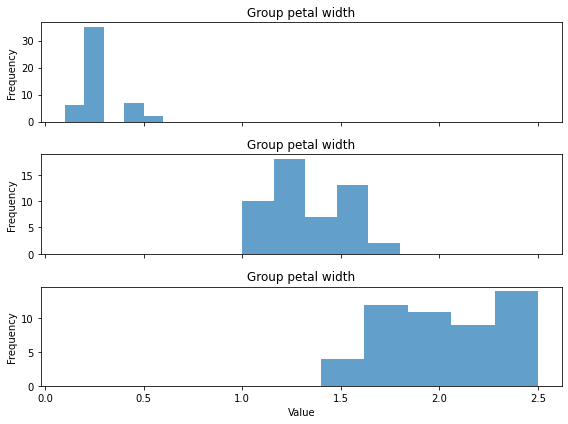

In [81]:
# Plot Histogram
groups = df.groupby('class')

fig, axes = plt.subplots(len(groups), 1, figsize=(8, 6), sharex=True)

for (name, group), ax in zip(groups, axes):
    ax.hist(group[group_selector.value], bins=5, alpha=0.7)
    ax.set_title(f'Group {group_selector.value}')
    ax.set_ylabel('Frequency')

plt.xlabel('Value')
plt.tight_layout()
plt.show()

In [47]:
# Check distribution of each feature by class
print(df[['sepal length', 'class']].groupby('class').describe())
print(df[['sepal width', 'class']].groupby('class').describe())
print(df[['petal length', 'class']].groupby('class').describe())
print(df[['petal width', 'class']].groupby('class').describe())

                sepal length                                            
                       count   mean       std  min    25%  50%  75%  max
class                                                                   
Iris-setosa             50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8
Iris-versicolor         50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0
Iris-virginica          50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9
                sepal width                                              
                      count   mean       std  min    25%  50%    75%  max
class                                                                    
Iris-setosa            50.0  3.418  0.381024  2.3  3.125  3.4  3.675  4.4
Iris-versicolor        50.0  2.770  0.313798  2.0  2.525  2.8  3.000  3.4
Iris-virginica         50.0  2.974  0.322497  2.2  2.800  3.0  3.175  3.8
                petal length                                             
                       count   mean       st

In [ ]:
# Based on histograms and descriptive statistics, it appears that petal length and 
